# PSI3431 - Experiência 1

|Alunos da Dupla                   |NUSP    |E-mail USP       |
|----------------------------------|--------|-----------------|
|Pedro Ian de Almeida Soares  |12554327|pedroian@usp.br|
|Thiago da Rocha Calomino Gonçalves|12554647|thcalomino@usp.br|

# Instalação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import scipy.signal as sig
from scipy.fftpack import fft, fftfreq, ifft

import IPython.display as ipd

## Item a) Amostragem do Sinal

Considere o sinal

 $$
\begin{equation*}
x_o(t) = \left\{
        \begin{array}{ll}
            \sin^3(\Omega t) e^{-\dfrac{t}{\tau}} & \quad t \geq 0 \\
            0 & \quad t \lt 0
        \end{array}
    \right.
\end{equation*}
 $$

com $\Omega$ = 2$\pi$ × 500 rad/s e $\tau$ = 0.5 s. Amostre $x_o(t)$ com uma frequência de amostragem $f_a$ = 40 kHz por 2 segundos para obter o sinal discreto $x_o[n]$. Qual é o comprimento de $x_o[n]$?

Ouça o sinal $x_o[n]$ usando o comando `sound(x0, 40000)` no Matlab, ou o comando `wavplay(x0, 40_000)` em Julia (você vai precisar carregar antes o pacote WAV: using WAV).

⭐ O sinal de tempo contínuo $x_o(t) = \sin^3(\Omega t) e^{-\dfrac{t}{\tau}}$ foi amostrado por uma frequência de amostragem $f_a = 40$ kHz, implicando num período de amostragem $T_a = 1/f_a = 25 \mu s$:

Assim, foi obtido o sinal de tempo discreto $x_o[n] = x_o(t = nT_a)$, ou seja:

$$
x_o[n] = \sin^3(\Omega nT_a) e^{-\dfrac{nT_a}{\tau}}
$$

Logo, no intervalo de tempo de 0 a 2 segundos temos um total de 80000 amostras e, portanto, o comprimento de $x_o[n]$ será N = 80001.

$$\Delta t = 2 s$$
$$T_a = 25 \mu s$$

$$ \therefore N = \dfrac{\Delta t}{T_a} = 80000$$

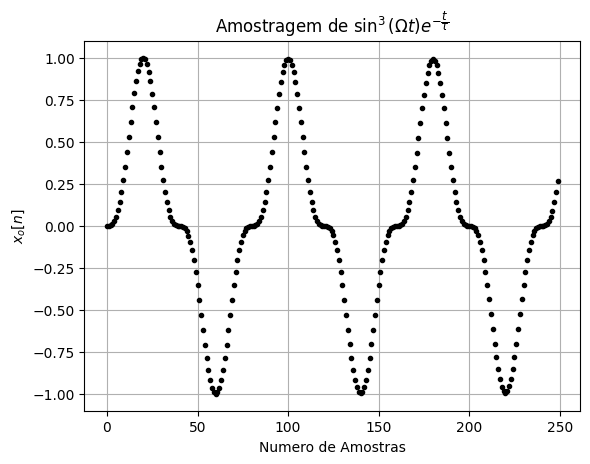

In [ ]:
# Frequencia de amostragem fa = 40kHz -> Ta = 0,0000025 s (25 microssegundos)
# Logo, há exatamente 80 mil amostras entre 0 e 2s

Sr = 40000
N = 2
gr = 250
n = np.linspace(0, N, int(N*Sr), endpoint=False)
n2 = np.linspace(0, gr, gr, endpoint=False)

Omega = 2*np.pi*500
tau = 0.5

x0 = ((np.sin(Omega * n))**3)*np.exp(-(n)/tau)
plt.plot(n2, x0[0:250], "k.")

plt.grid()
plt.xlabel("Numero de Amostras")
plt.ylabel(r"$x_o[n]$")
plt.title(r"Amostragem de $ \sin^3(\Omega t) e^{-\dfrac{t}{\tau}}$");

ipd.Audio(x0, rate=Sr, autoplay=False)

## Item b) Adição do ruído

Adicione um ruído branco gaussiano a $x_o[n]$ para obter o sinal ruidoso $x[n]$, de forma que $x[n]$ tenha SNR igual a 10 dB. Mostre no mesmo gráfico o sinal ruidoso e o sinal sem ruído. Ouça o sinal $x[n]$.

❗Sabendo que potência de um sinal pode ser representado por
$$
c_x = E\{x^2\} - (E\{x\})^2
$$

Temos que $c_x = r_x - \mu_x$ e, dado que a função é senoidal temos $\mu_x = 0$. Lgoo, podemos calcular a potência de um sinal x_o[n] elevando todos os elementos ao quadrado e calculando sua média. Temos que a potência média de $x_o[n]$ é:

$$
Pot\{x_o[n]\} = E\{ x_o[n]^2 \}
$$

Para um SNR (_signal-noise ratio_) igual a 10dB, é necessária uma potência 10 vezes maior que a de $v_x$, pois:

$$
SNR = 10 \log_{10}\left(\dfrac{Pot\{x_o[n]\}}{Pot\{v_x\}}\right)
$$

$$
10 = 10 \log_{10}\left(\dfrac{Pot\{x_o[n]\}}{Pot\{v_x\}}\right)
$$

$$
\therefore Pot\{x_o[n]\} = 10Pot\{v_x\}
$$

Sabemos também que se a variância $\sigma^2$ de um sinal é igual à sua potência nos casos onde o valor esperado é zero, então podemos representar seu desvio padrão como $\sigma_{v_x} = \sqrt{Pot\{x_o[n]\}}$

Para fazer um ruído gaussiano com desvio padrão diferente de 1, multiplicamos $\sqrt{Pot_v}$ por todos os termos do vetor gerado pela função `randn`, cuja distribuição é gaussiana normalizada com desvio padrão 1 e valor esperado 0, pois $\sigma_{1,2} = \sigma_1 \sigma_2$

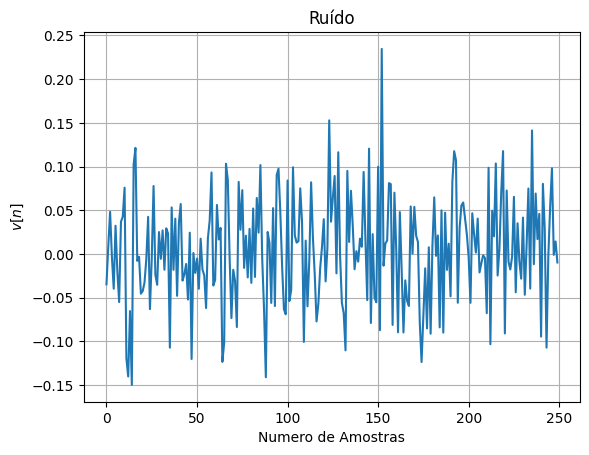

In [ ]:
pot_x = np.mean(x0**2)
pot_v = pot_x/10 # SNR igual a 10 dB
v = np.sqrt(pot_v) * np.random.randn(N*Sr); #sigma_v = sqrt(pot_v)

plt.plot(n2, v[0:250])

plt.grid()
plt.xlabel("Numero de Amostras")
plt.ylabel(r"$v[n]$")
plt.title(r"Ruído");

ipd.Audio(v, rate=Sr, autoplay=False)

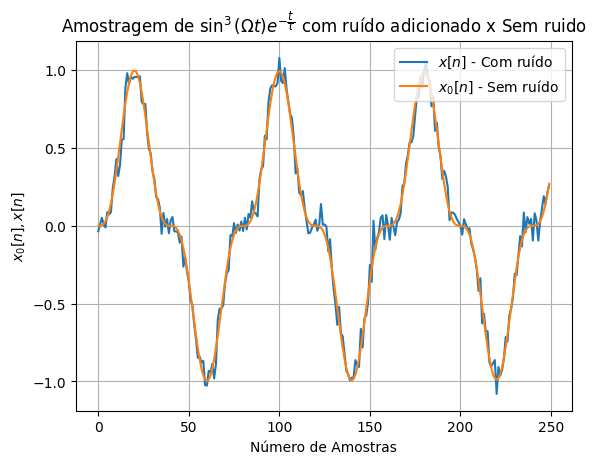

In [ ]:
x = x0 + v

plt.plot(n2, x[0:250], label=r"$x[n]$ - Com ruído")
plt.plot(n2, x0[0:250], label=r"$x_0[n]$ - Sem ruído")

plt.grid()
plt.legend()
plt.xlabel("Número de Amostras")
plt.ylabel(r"$x_0[n], x[n]$")
plt.title(r"Amostragem de $\sin^3(\Omega t) e^{-\dfrac{t}{\tau}}$ com ruído adicionado x Sem ruido");

ipd.Audio(x, rate=Sr, autoplay=False)

## Item c) Projetando o filtro passa-baixas

Considere o filtro com resposta ao impulso
$h[n] = 0,1 sinc (0, 1(n − 50))$, para $0 \leq n \leq 100$, e zero caso contrário.

 $$
\begin{equation*}
h[n] = \left\{
        \begin{array}{ll}
            0,1 sinc(0,1(n - 50)) & \quad 0 \leq n \leq 100\\
            0 & \quad c.c.
        \end{array}
    \right.
\end{equation*}
 $$


Plote a resposta em frequência deste filtro (use o comando `freqz` do Matlab ou o comando `freqresp` de Julia — neste último caso, carregue antes o pacote DSP, e use o comando `freqresp(PolynomialRatio(h, [1]))`).

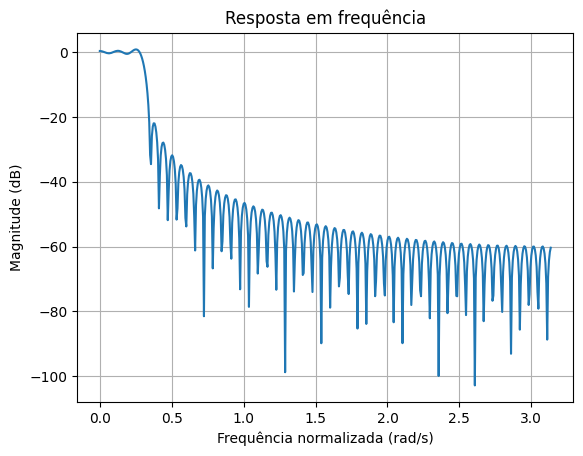

In [ ]:
nh = 100
n_h = np.linspace(0, nh, nh, endpoint=False)

h = 0.1*np.sinc(0.1*(n_h-50))
h.resize(80000)

w,h1 = sig.freqz(h)

plt.plot(w, 20*np.log10(abs(h1)))
plt.grid()
plt.xlabel("Frequência normalizada (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.title("Resposta em frequência");

## Item d) Filtrando o sinal

Passe os sinais $x_o[n]$ e $x[n]$ pelo filtro $H(z)$, obtendo os sinais $y_o[n]$ e $y[n]$ (use o comando `filter` do Matlab ou o comando `filt` de Julia). Plote no mesmo gráfico $y_o[n]$ e $y[n]$. Ouça os sinais $y_o[n]$ e $y[n]$.

In [ ]:
ya = fft(h)
yb = fft(x0)
yc = fft(x)
yd = ya*yb
ye = ya*yc

y0 = ifft(yd)
y = ifft(ye)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


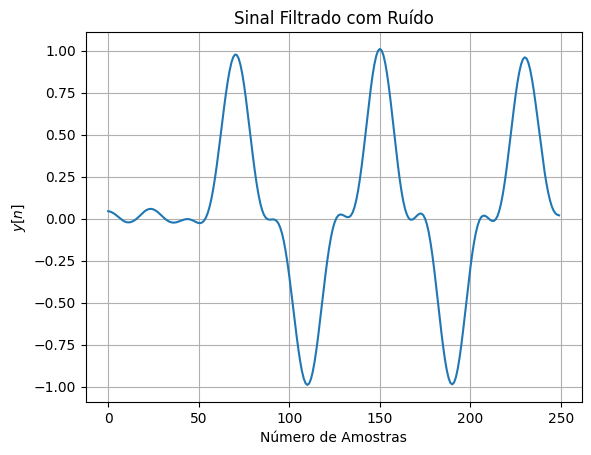

In [ ]:
plt.plot(n2, y[0:250])

plt.grid()
plt.xlabel("Número de Amostras")
plt.ylabel(r"$y[n]$")
plt.title(r"Sinal Filtrado com Ruído");

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


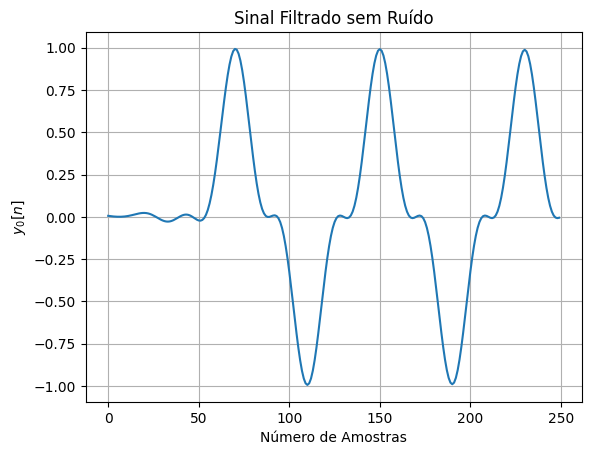

In [ ]:
plt.plot(n2, y0[0:250])

plt.grid()
plt.xlabel("Número de Amostras")
plt.ylabel(r"$y_0[n]$")
plt.title(r"Sinal Filtrado sem Ruído");

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


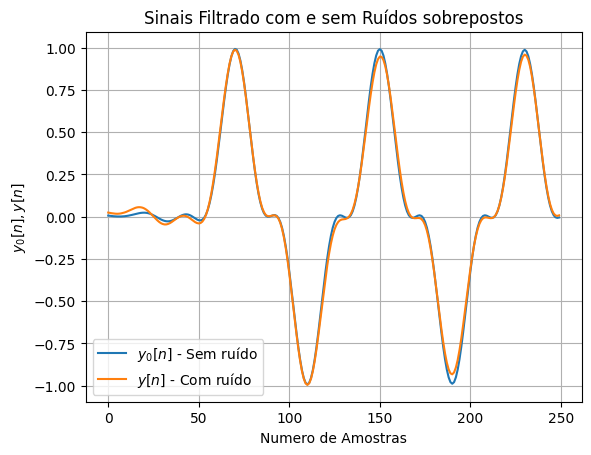

In [ ]:
plt.plot(n2, y0[0:250], label=r"$y_0[n]$ - Sem ruído")
plt.plot(n2, y[0:250], label=r"$y[n]$ - Com ruído")

plt.grid()
plt.legend()
plt.xlabel("Numero de Amostras")
plt.ylabel(r"$y_0[n], y[n]$")
plt.title(r"Sinais Filtrado com e sem Ruídos sobrepostos");

Ouvindo os sinais de ruído antes e depois do filtro, temos:

In [ ]:
ipd.Audio(x, rate=Sr, autoplay=False)

In [ ]:
ipd.Audio(y, rate=Sr, autoplay=False)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## Item e) Classificação quanto à característica estacionária

Explique porque $x[n]$ e $y[n]$ não são processos estacionários em nenhum sentido, mas os ruídos $v_x[n] = x[n] - x_o[n]$ e $v_y[n] = y[n] - y_o[n]$ são estacionários no sentido amplo (no caso de $v_y[n]$, desprezando-se o transitório do filtro).


▶ Por quê $x[n]$ e $y[n]$ não são estacionários em nenhum sentido:

O sinal de entrada $x_o[n]$ é determinístico, enquanto que $x[n]$, que é o sinal afetado por ruído, pode ser visto como um processo
estacionário $X[n]$. A média do ruído $v_x[n]$ é nula (conforme mostrado abaixo). O valor do sinal $x_o[n]$ varia conforme o instante n, de modo que o valor esperado de $X[n]$ é dado por:

$$
E\{ X[n] \} = x_o[n] + E\{ V_{x}[n] \} = x_o[n] + 0 = x_o[n] \forall n,
$$

Como a média de $X[n]$ não é constante, resulta que esse processo não é estacionário no sentido amplo, ou seja: não éestacionário em nenhum sentido.

Por outro lado, a partir de um argumento similar (também baseado no fato que $E\{ V_x[n] \} = 0$), concluímos que a média do processo $Y[n]$ não é constante, e, portanto, $y[n]$ também não é estacionário em nenhum sentido.

▶ O ruído $v_x[n]$ é estacionário no sentido amplo

O ruído $v_x[n] = x[n] - x_o[n]$ consiste na realização de um processo estocástico $V_x[n]$, onde $V_x[n] ~ N(0, \sigma^2)$, ou seja, a função de distribuição de probabilidade de $V_x[n]$ é dada por:

$$
f_{V_x[n]}(x;n] = \dfrac{1}{\sqrt{2 \pi \sigma^2}} \cdot
\exp{\left( -\dfrac{x^2}{2 \sigma^2} \right)}
$$

O valor esperado de $V_x[n]$ é constante e nulo, para todo n.

Além disso, levando em conta que $V_x[n]$ é i.i.d. (independente e identicamente distribuída), calculamos a sua autocorrelação como segue:

$r_{V_x}[n_1,n_2] = E\{ V_x[n_1] . V_x[n_2] \} = E\{V_x[n_1]\}.E\{V_x[n_2]\} = 0.0 = 0$, se $n_1 \neq n_2$

e $ r_{V_x}[n_1,n_2] = E\{ V_x[n_1] . V_x[n_2] \} = E\{ V_x^2[n_1] \} = \sigma^2 + E\{ V_x[n_1] \} = \sigma^2 + 0 = \sigma^2 $, se $n_1 = n_2$.

Podemos escrever que $r_{V_x}[n_1,n_2] = \sigma^2 . \delta[n_1 - n_2] = \sigma^2 . \delta[\tau]$, para quaisquer dois instantes $n_1$ e $n_2$. Observamos que a autocorrelação depende apenas da diferença $\tau = n_1 - n_2$ entre os instantes considerados.

Nota-se assim que ficam satisfeitas as duas condições que caracterizam o processo como estacionário em sentido amplo.

▶ Por quê o ruído $v_y[n]$ é estacionário no sentido amplo (desconsiderando transitórios)

O filtro $H(z)$ implementado consiste em um sistema linear e invariante no tempo (SLIT). O ruído $v_y[n]$ de saída consiste,portanto, no sinal obtido ao se aplicar o ruído $v_x[n]$ na entrada do sistema. Como sabemos, se a entrada de um SLIT é um processo estocástico no sentido amplo, então sua saída também o é, como mostrado nas páginas 59 e 60 da apostila do curso. Concluímos, assim, que o ruído $v_y[n]$ é estacionário no sentido amplo.

## Item f) Valores Esperados

Calcule teoricamente os valores esperados
$P_{v_x}[n] ≜ E\{{v_x^2[n]}\}$ e
$P_{v_y}[n] ≜ E\{{v_y^2[n]}\}$
na entrada e na saída, imaginando que o filtro está em regime (ou seja, para n $\geq$ 100).

▶ Dado que os ruídos $v_x[n]$ e $v_y[n]$ são gaussianos e $\mu_X = E\{X\}$, podemos fazer:

$$
\sigma_{v_x}^2 = E\{ v_x^2[n] \} - (\mu_{v_x})^2
$$
$$
\sigma_{v_y}^2 = E\{ v_y^2[n] \} - (\mu_{v_y})^2
$$

Como $\mu_{v_x} = \mu_{v_y} = 0$. Logo:

$$
E\{ v_x^2[n] \} = \sigma_{v_x}^2 = P_{v_x}[n]
$$
$$
E\{ v_y^2[n] \} = \sigma_{v_y}^2 = P_{v_y}[n]
$$

Portanto, os valores esperados são iguais às variâncias do respectivo ruído gaussiano.

## Item g) Medidas experimentais dos Valores Esperados

Meça experimentalmente os valores esperados $P_{v_x}
[n]$ e $P_{v_y}[n]$ dos ruídos em $x[n]$ e
em $y[n]$, para diferentes valores de n:

### Item g-a)

Calcule a média de diversas realizações dos processos. Por exemplo no caso de $P_{v_x}[n]$ use a fórmula abaixo para $L = 1.000$:

$$
P_{v_x}[n] ≈ \dfrac{1}{L} \sum_{l = 1}^L (v_x^{(l)} [n])^2
$$

Calcule a expressão para todos os valores de n, e veja se eles são aproximadamente constantes ou não. O que acontece para $0 \leq n \leq 100$?

In [ ]:
Pr = (sum((v)**2))/(v.shape[0])
print((10)*(np.log10(pot_x/Pr)))

10.02529441364662


[0.00398403 0.00373279 0.00411562 ... 0.00420494 0.0038565  0.00414005]


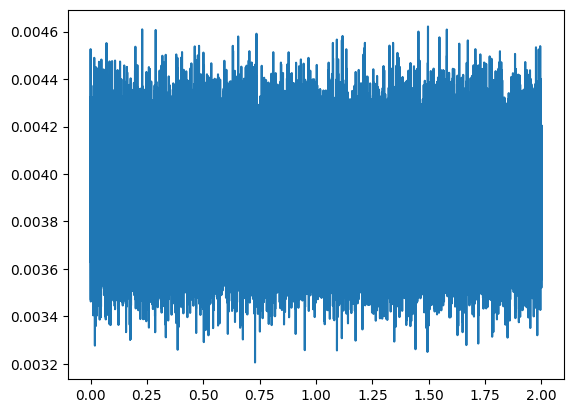

In [21]:
vl = np.zeros((1000, 80000))
pvx = np.zeros(80000)

for i in range (1000):
  vl[i, :] = np.sqrt(pot_v)*np.random.randn(N*Sr);

for i in range (1000):
  pvx = ((vl[i, :])**2) + pvx

pvx = pvx/1000

print(pvx)
plt.plot(n, pvx)

Os valores são praticamente constantes

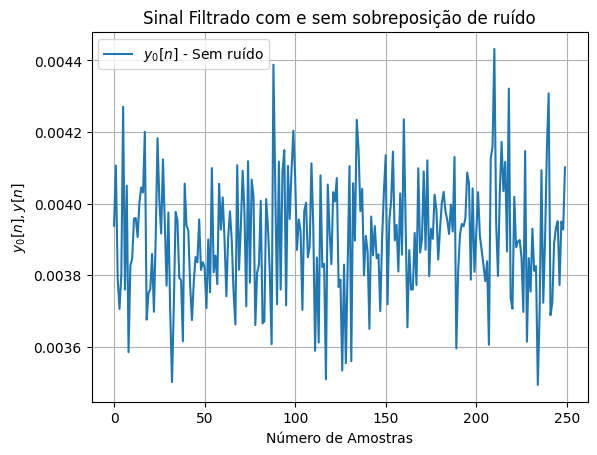

In [20]:
plt.plot(n2[0:250], pvx[0:250], label=r"$y_0[n]$ - Sem ruído")

plt.grid()
plt.legend()
plt.xlabel("Número de Amostras")
plt.ylabel(r"$y_0[n], y[n]$")
plt.title(r"Sinal Filtrado com e sem sobreposição de ruído");

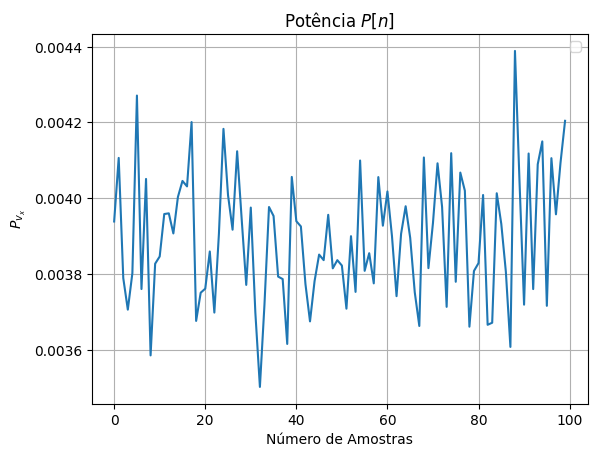

In [19]:
plt.plot(n2[0:100], pvx[0:100])

plt.grid()
plt.legend()
plt.xlabel("Número de Amostras")
plt.ylabel(r"$P_{v_x}$")
plt.title(r"Potência $P[n]$");

In [22]:
pvx2 = 0

for i in range (80000):
  pvx2 = vl[0, i]**2 + pvx2

pvx2 = pvx2/1000

print(pvx2)

0.3127078196960022


### Item g-b) Comparação de médias

Compare com as médias temporais

$$
P_{x, med} ≈ \dfrac{1}{N} \sum_{n = 0}^{N-1} (v_x^{(l)} [n])^2,
$$ e

$$
P_{y, med} ≈ \dfrac{1}{N} \sum_{n = 0}^{N-1} (v_y^{(l)} [n])^2
$$

em que agora $l$ corresponde a uma realização qualquer do ruído e $N$ é o comprimento do sinal. Compare para diversas realizações diferentes do processo (diferentes valores de $l$).

Compare os resultados obtidos com as duas expressões entre si e com o valor teórico. Os resultados ficam mais próximos quando os valores de N e L são aumentados para 10.000? Para 100.000?

In [ ]:
pvx2 = 0

for i in range (80000):
  pvx2 = vl[0, i]**2 + pvx2

pvx2 = pvx2/1000

print(pvx2)